In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale


import math

from IPython.display import display
import statsmodels.formula.api as smf

# Display preferences.
pd.options.display.float_format = '{:.3f}'.format



In [104]:
df = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls', header=4, skip_footer=3)
df.columns = [c.replace('\n', ' ') for c in df.columns]
df.to_csv('cleaned_crime.csv')
df = pd.read_csv('cleaned_crime.csv', index_col=0)
df.fillna(0)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,0.000,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,0.000,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,0.000,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,0.000,30,227,526,4090,705,3243,142,0.000
4,Albion Village,6388,23,0,0.000,3,4,16,223,53,165,5,0.000
5,Alfred Village,4089,5,0,0.000,0,3,2,46,10,36,0,0.000
6,Allegany Village,1781,3,0,0.000,0,0,3,10,0,10,0,0.000
7,Amherst Town,118296,107,1,0.000,7,31,68,2118,204,1882,32,3.000
8,Amityville Village,9519,9,0,0.000,2,4,3,210,16,188,6,1.000
9,Amsterdam,18182,30,0,0.000,0,12,18,405,99,291,15,0.000


In [105]:
df_Norm = pd.DataFrame()
for column in df:
    if column == 'City':
        df_Norm[column] = df[column]
    elif column != 'Population':
        df_Norm[str.replace(column,' ','_') + '_norm'] = pd.to_numeric(df[column],errors='coerce')/df['Population']

df_Norm_outlier_removed = df_Norm[['Motor_vehicle_theft_norm', 'Burglary_norm', 'Larceny-_theft_norm','Property_crime_norm']].query('Property_crime_norm < .10')

#df_Norm
df_Norm_outlier_removed.head()

,Motor_vehicle_theft_norm,Burglary_norm,Larceny-_theft_norm,Property_crime_norm
0,0.000,0.001,0.005,0.006
1,0.000,0.001,0.008,0.009
2,0.000,0.000,0.005,0.006
3,0.001,0.007,0.033,0.042
4,0.001,0.008,0.026,0.035


In [106]:
correlation_matrix = df_Norm_outlier_removed.corr()
display(correlation_matrix)

,Motor_vehicle_theft_norm,Burglary_norm,Larceny-_theft_norm,Property_crime_norm
Motor_vehicle_theft_norm,1.000,0.539,0.406,0.494
Burglary_norm,0.539,1.000,0.634,0.760
Larceny-_theft_norm,0.406,0.634,1.000,0.984
Property_crime_norm,0.494,0.760,0.984,1.000


In [107]:
#independent and dependent variables
Y = df_Norm_outlier_removed['Property_crime_norm']
X = df_Norm_outlier_removed[['Motor_vehicle_theft_norm', 'Burglary_norm', 'Larceny-_theft_norm']].copy()
X.head()



,Motor_vehicle_theft_norm,Burglary_norm,Larceny-_theft_norm
0,0.000,0.001,0.005
1,0.000,0.001,0.008
2,0.000,0.000,0.005
3,0.001,0.007,0.033
4,0.001,0.008,0.026


In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

lg = LinearRegression()
#lg.fit(scale(X), scale(Y))
lg.fit(X,Y)


# Inspect the results.
print('\nCoefficients: \n', lg.coef_)
print('\nIntercept: \n', lg.intercept_)
print('\nR-squared:')
print(lg.score(scale(X), scale(Y)))



Coefficients: 
 [1. 1. 1.]

Intercept: 
 1.0408340855860843e-17

R-squared:
-1.6421528186392347


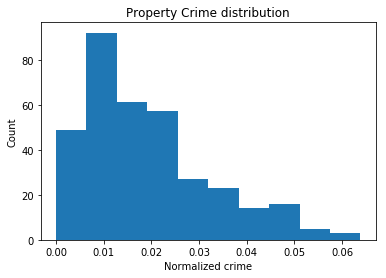

In [109]:
# Plot property crime
plt.hist(df_Norm_outlier_removed['Property_crime_norm'])
plt.title('Property Crime distribution')
plt.xlabel('Normalized crime')
plt.ylabel('Count')
plt.show()


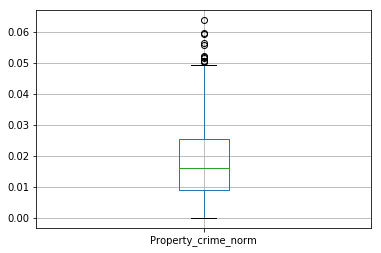

In [110]:
df_Norm_outlier_removed.boxplot(column='Property_crime_norm')

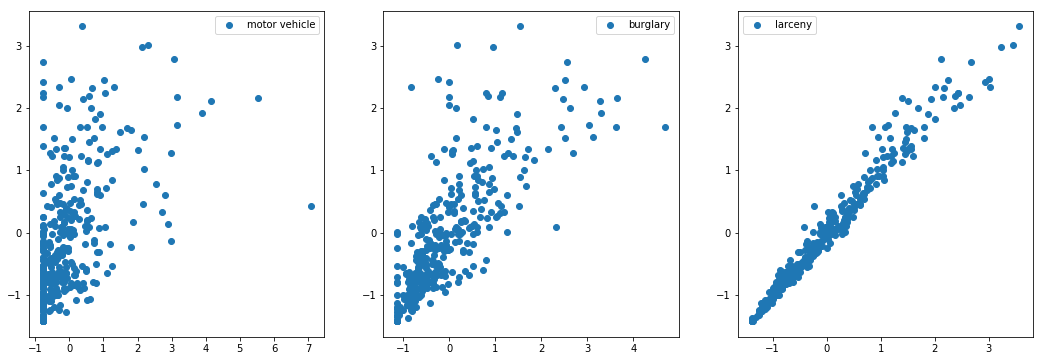

In [112]:

fig  = plt.figure(figsize=(18,6))

plt.subplot(131)
plt.scatter(scale(df_Norm_outlier_removed['Motor_vehicle_theft_norm']), scale(df_Norm_outlier_removed['Property_crime_norm']), label='motor vehicle')
plt.legend()

plt.subplot(132)
plt.scatter(scale(df_Norm_outlier_removed['Burglary_norm']), scale(df_Norm_outlier_removed['Property_crime_norm']), label='burglary')
plt.legend()

plt.subplot(133)
plt.scatter(scale(df_Norm_outlier_removed['Larceny-_theft_norm']), scale(df_Norm_outlier_removed['Property_crime_norm']), label='larceny')
plt.legend()






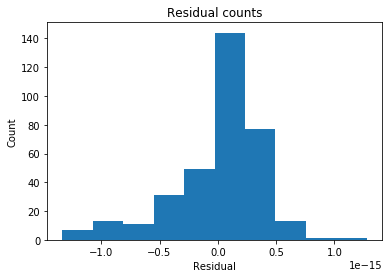

In [113]:
# Extract predicted values.
predicted = lg.predict(scale(X)).ravel()
actual = scale(df_Norm_outlier_removed['Property_crime_norm'])

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

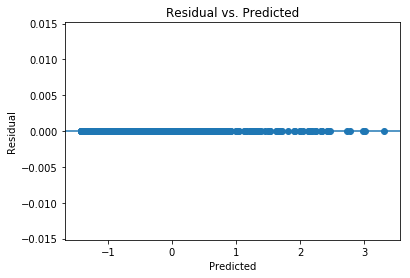

In [114]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

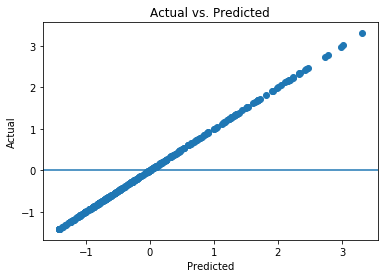

In [115]:
plt.scatter(predicted, actual)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.axhline(y=0)
plt.title('Actual vs. Predicted')
plt.show()


In [116]:
df = pd.read_excel('Table_8_Offenses_Known_to_Law_Enforcement_by_New_York_by_City_2014.xls', header=4, skip_footer=3)
df.columns = [c.replace('\n', ' ') for c in df.columns]
df.to_csv('cleaned_crime.csv')
df = pd.read_csv('cleaned_crime.csv', index_col=0)
df.fillna(0)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1851.000,0.000,0.000,0.000,0.000,0.000,0.000,11.000,1.000,10.000,0.000,0.000
1,Addison Town and Village,2568.000,2.000,0.000,0.000,0.000,1.000,1.000,49.000,1.000,47.000,1.000,0.000
2,Afton Village4,820.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000
3,Akron Village,2842.000,1.000,0.000,0.000,0.000,0.000,1.000,17.000,0.000,17.000,0.000,0.000
4,Albany4,98595.000,802.000,8.000,54.000,0.000,237.000,503.000,3888.000,683.000,3083.000,122.000,12.000
5,Albion Village4,5872.000,26.000,0.000,3.000,0.000,2.000,21.000,204.000,41.000,159.000,4.000,0.000
6,Alexandria Bay Village4,1107.000,0.000,0.000,0.000,0.000,0.000,0.000,7.000,2.000,5.000,0.000,0.000
7,Alfred Village4,4032.000,11.000,1.000,1.000,0.000,0.000,9.000,30.000,6.000,24.000,0.000,0.000
8,Altamont Village4,1723.000,1.000,0.000,0.000,0.000,0.000,1.000,2.000,2.000,0.000,0.000,0.000
9,Amherst Town4,118860.000,128.000,1.000,16.000,0.000,43.000,68.000,2066.000,176.000,1846.000,44.000,2.000


In [117]:
df_Norm = pd.DataFrame()
for column in df:
    if column == 'City':
        df_Norm[column] = df[column]
    elif column != 'Population':
        df_Norm[str.replace(column,' ','_') + '_norm'] = pd.to_numeric(df[column],errors='coerce')/df['Population']

df_Norm_outlier_removed = df_Norm[['Motor_vehicle_theft_norm', 'Burglary_norm', 'Larceny-_theft_norm','Property_crime_norm']].query('Property_crime_norm < .10')

#df_Norm
df_Norm_outlier_removed.head()

,Motor_vehicle_theft_norm,Burglary_norm,Larceny-_theft_norm,Property_crime_norm
0,0.000,0.001,0.005,0.006
1,0.000,0.000,0.018,0.019
2,0.000,0.000,0.001,0.001
3,0.000,0.000,0.006,0.006
4,0.001,0.007,0.031,0.039


In [118]:
#independent and dependent variables
Y = df_Norm_outlier_removed['Property_crime_norm']
X = df_Norm_outlier_removed[['Motor_vehicle_theft_norm', 'Burglary_norm', 'Larceny-_theft_norm']].copy()
X.head()



,Motor_vehicle_theft_norm,Burglary_norm,Larceny-_theft_norm
0,0.000,0.001,0.005
1,0.000,0.000,0.018
2,0.000,0.000,0.001
3,0.000,0.000,0.006
4,0.001,0.007,0.031


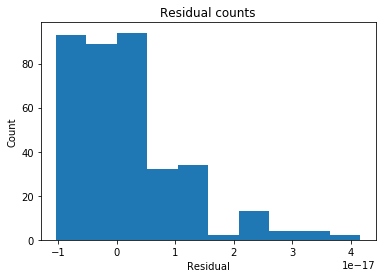

In [125]:
# Extract predicted values.
#predicted = lg.predict(scale(X)).ravel()
predicted = lg.predict(X).ravel()
#actual = scale(df_Norm_outlier_removed['Property_crime_norm'])
actual = df_Norm_outlier_removed['Property_crime_norm']


# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

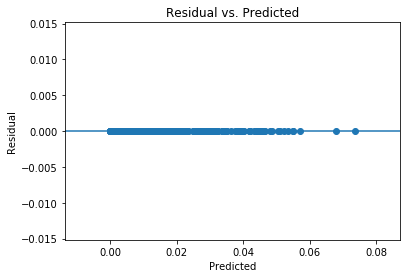

In [126]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

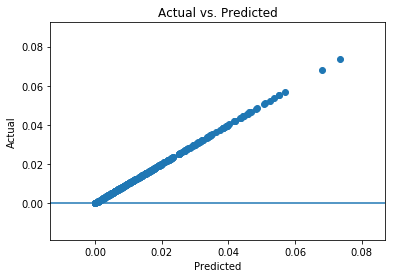

In [127]:
plt.scatter(predicted, actual)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.axhline(y=0)
plt.title('Actual vs. Predicted')
plt.show()


In [129]:
from sklearn.model_selection import cross_val_score
cross_val_score(lg,X, Y, cv=5, scoring = 'r2')

array([1., 1., 1., 1., 1.])

In [134]:
#trying statsmodels
from statsmodels.sandbox.regression.predstd import wls_prediction_std


df_Norm_outlier_removed.columns = [c.replace('-', '') for c in df_Norm_outlier_removed.columns]

linear_formula = 'Property_crime_norm ~ Motor_vehicle_theft_norm+Burglary_norm+Larceny_theft_norm'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df_Norm_outlier_removed).fit()
lm.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Property_crime_norm   R-squared:                       1.000
Model:                             OLS   Adj. R-squared:                  1.000
Method:                  Least Squares   F-statistic:                 2.518e+32
Date:                 Sun, 29 Apr 2018   Prob (F-statistic):               0.00
Time:                         14:05:15   Log-Likelihood:                 13877.
No. Observations:                  367   AIC:                        -2.775e+04
Df Residuals:                      363   BIC:                        -2.773e+04
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1.339e-17   7.71e-19     17.372      0.000    1.19e-17    1.49e-17
Motor_vehicle_theft_norm     1.0000   9.69e-16   1.03e+15      0.000       1.000       1.000
Burglary_norm                1.0000    2.7e-16    3.7e+15      0.000       1.000       1.000
Larceny_theft_norm           1.0000    5.9e-17   1.69e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                      116.361   Durbin-Watson:                   0.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.231
Skew:                           1.581   Prob(JB):                     3.83e-61
Kurtosis:                       5.864   Cond. No.                     2.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""